In [137]:
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as lr
from sklearn.model_selection import train_test_split
import numpy as np

In [34]:

temp_data = pd.read_csv('data/deaths-in-armed-conflicts-by-type.csv')

In [35]:
temp_data.tail(20)

,Entity,Code,Year,Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence,Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict,Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic,Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate,Deaths in ongoing conflicts (best estimate) - Conflict type: interstate
184,World,OWID_WRL,2003,11738,3469,0,14613,8164
185,World,OWID_WRL,2004,10857,4140,0,19420,0
186,World,OWID_WRL,2005,4736,2171,0,12138,0
187,World,OWID_WRL,2006,4183,3075,0,19718,0
188,World,OWID_WRL,2007,4560,4170,0,19212,0
189,World,OWID_WRL,2008,4122,4556,0,28643,35
190,World,OWID_WRL,2009,5613,7395,0,34603,0
191,World,OWID_WRL,2010,3671,6146,0,21087,0
192,World,OWID_WRL,2011,6706,6916,0,25041,29
193,World,OWID_WRL,2012,6411,5165,0,73665,367


In [36]:
temp_data['Entity'].unique()

array(['Africa', 'Americas', 'Asia and Oceania', 'Europe', 'Middle East',
       'World'], dtype=object)

In [41]:
data = temp_data[temp_data["Entity"] == 'World']

In [42]:
data.head()

,Entity,Code,Year,Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence,Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict,Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic,Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate,Deaths in ongoing conflicts (best estimate) - Conflict type: interstate
170,World,OWID_WRL,1989,7992,4170,0,53978,868
171,World,OWID_WRL,1990,9863,5251,0,79144,1086
172,World,OWID_WRL,1991,9739,3860,0,48449,21889
173,World,OWID_WRL,1992,11703,10459,0,53353,25
174,World,OWID_WRL,1993,10784,11905,0,44946,0


In [73]:
data.reset_index(drop=True, inplace=True)

In [74]:
data.shape

(34, 7)

In [75]:
data.rename(columns={
    'Deaths in ongoing conflicts (best estimate) - Conflict type: one-sided violence' : 'One-sided-violence',
    'Deaths in ongoing conflicts (best estimate) - Conflict type: non-state conflict' : 'Non-state-conflict',
    'Deaths in ongoing conflicts (best estimate) - Conflict type: extrasystemic' :  'Extrasystemic',
    'Deaths in ongoing conflicts (best estimate) - Conflict type: intrastate' : 'Intrastate',
    'Deaths in ongoing conflicts (best estimate) - Conflict type: interstate' : 'Interstate',
}, inplace=True)

/tmp/ipykernel_3184/1595427464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={


In [76]:
# data.Entity.unique()
# data.Code.unique()
# data.Year.unique()
# data['One-sided-violence'].unique()
# data['Non-state-conflict'].unique()
# data['Extrasystemic'].unique()
# data['Interstate'].unique()
data['Intrastate'].unique()

array([ 53978,  79144,  48449,  53353,  44946,  38420,  36006,  28253,
        40469,  38769,  32500,  28163,  21810,  20680,  14613,  19420,
        12138,  19718,  19212,  28643,  34603,  21087,  25041,  73665,
        93451, 115813, 103545,  89983,  71704,  54586,  52125,  53189,
        83884, 122283])

In [ ]:
data.drop("Extrasystemic", axis='columns', inplace=True)

In [83]:
data

,Entity,Code,Year,One-sided-violence,Non-state-conflict,Intrastate,Interstate
0,World,OWID_WRL,1989,7992,4170,53978,868
1,World,OWID_WRL,1990,9863,5251,79144,1086
2,World,OWID_WRL,1991,9739,3860,48449,21889
3,World,OWID_WRL,1992,11703,10459,53353,25
4,World,OWID_WRL,1993,10784,11905,44946,0
5,World,OWID_WRL,1994,779243,5242,38420,42
6,World,OWID_WRL,1995,20032,4438,36006,99
7,World,OWID_WRL,1996,38850,4150,28253,91
8,World,OWID_WRL,1997,19791,3506,40469,127
9,World,OWID_WRL,1998,17123,3483,38769,1147


In [116]:
# Number of deaths greater than eleven thousand vs year

# Why the following works: Firstly, data[['Year', 'One-sided-violence]] gives me a dataframe then on that dataframe we apply the filter to get the final result!
# Similarly, for others as well

one_sided = data[['Year', 'One-sided-violence']][data['One-sided-violence'] > 11000] 
non_state = data[['Year', 'Non-state-conflict']][data['Non-state-conflict'] > 11000] 
intrastate = data[['Year', 'Intrastate']][data['Intrastate'] > 55000] 
interstate = data[['Year', 'Interstate']][data['Interstate'] > 11000]

In [118]:
violence_type_deaths = [one_sided, non_state, intrastate, interstate]

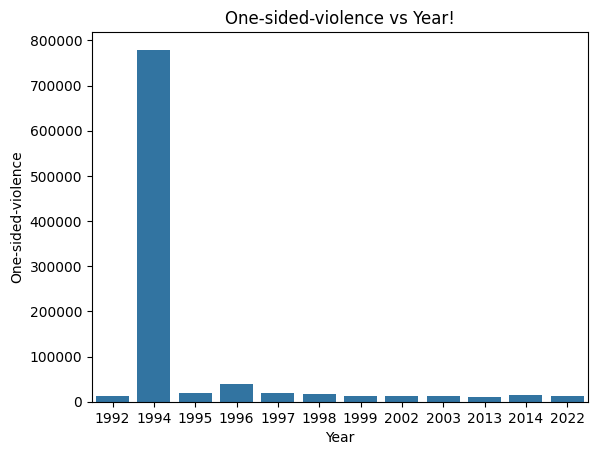

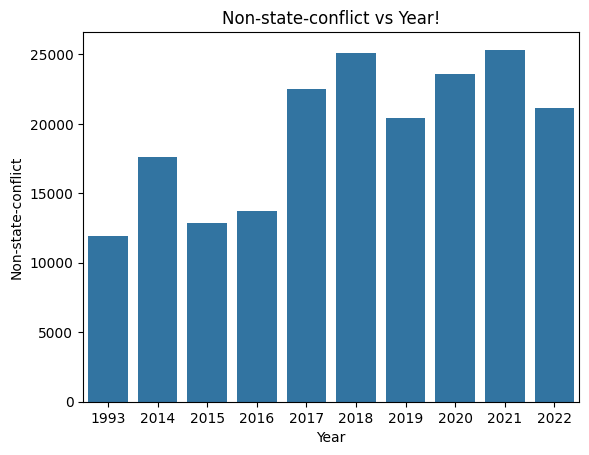

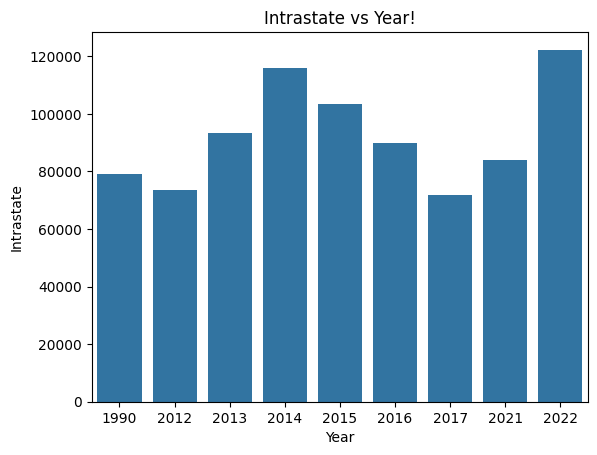

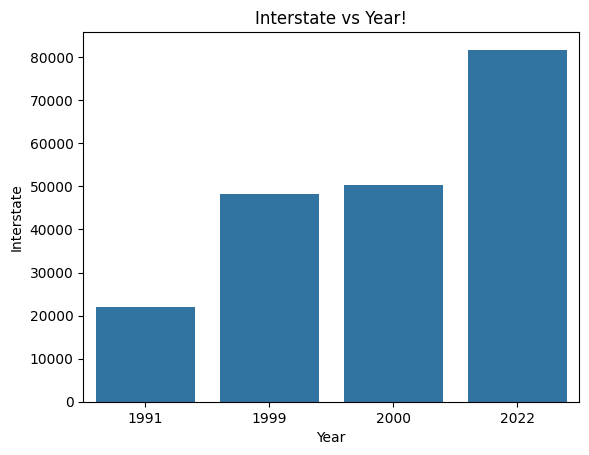

In [123]:
# Bar plot

for type in violence_type_deaths:
    plot = snb.barplot(data = type, x = type[f'{type.columns[0]}'], y = type[f'{type.columns[1]}'])
    plot.set_title(f'{type.columns[1]} vs Year!')
    plt.show()

In [127]:
data.head(15)

,Entity,Code,Year,One-sided-violence,Non-state-conflict,Intrastate,Interstate
0,World,OWID_WRL,1989,7992,4170,53978,868
1,World,OWID_WRL,1990,9863,5251,79144,1086
2,World,OWID_WRL,1991,9739,3860,48449,21889
3,World,OWID_WRL,1992,11703,10459,53353,25
4,World,OWID_WRL,1993,10784,11905,44946,0
5,World,OWID_WRL,1994,779243,5242,38420,42
6,World,OWID_WRL,1995,20032,4438,36006,99
7,World,OWID_WRL,1996,38850,4150,28253,91
8,World,OWID_WRL,1997,19791,3506,40469,127
9,World,OWID_WRL,1998,17123,3483,38769,1147


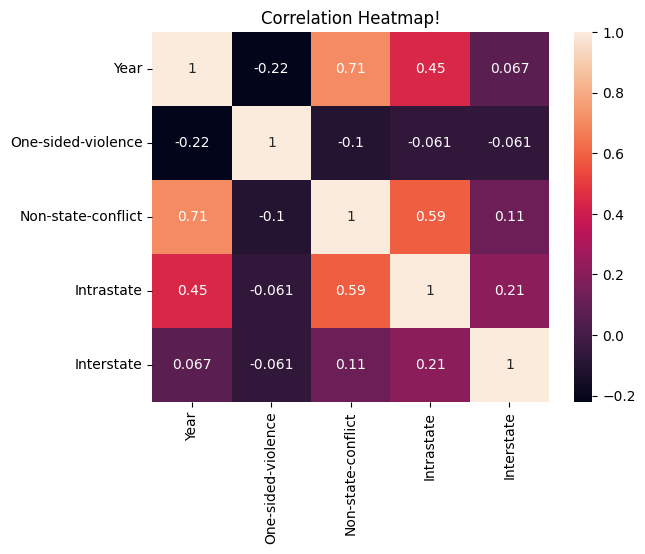

In [126]:
# Correlation heatmap

co_mtx = data.corr(numeric_only=True)

plot = snb.heatmap(co_mtx, annot=True)
plot.set_title('Correlation Heatmap!')
plt.show()

In [136]:
data.dtypes

Entity                object
Code                  object
Year                   int64
One-sided-violence     int64
Non-state-conflict     int64
Intrastate             int64
Interstate             int64
dtype: object

In [150]:
# Using the Scikit learn linear regression model for predicting deaths in year 2025

X = np.array(data['Year']).reshape(-1,1)
y = np.array(data['Non-state-conflict']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

model = lr()

model.fit(X_train, y_train)

print(model.score(X_test, y_test))

0.37913638614633394
